# 탐색적분석(EDA) 실습_타이타닉

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
#가설검정 및 통계분석
from scipy import stats
from statsmodels.formula.api import ols
#선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
import scipy.stats
from scipy.stats import chi2_contingency 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#qqplot, 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형모델 formula
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import omni_normtest 
%matplotlib inline

In [2]:
matplotlib.rc("font",family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus']=False

#### 분석목표 : 생존률에 영향을 미치는 영향인자 도출

- 가설1 : 선실등급은 생존에 영향을 주는 설명변수일 것이다.
- 가설2 : 성별은 생존에 영향을 주는 설명변수일 것이다.
- 가설3 : 나이는 생존에 영향을 주는 설명변수일 것이다.
- 가설4 : 승선장소는 생존에 영향을 주는 설명변수일 것이다.
- 가설5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
- 가설6 : 함께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수일 것이다.
- 가설7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수일 것이다.



- Pclass : 승객 등급, 1,2,3등석
- Name,Sex,Age : 이름 그대로의 의미 
- SibSp : 함께 탑승한 형제, 배우자 수
- Parch : 함께 탑승한 자녀, 부모의 수
- Ticket : 티켓 아이디
- Fare: 티켓 요금(파운드)
- Cabin : 객실 번호
- Embarked :  승객이 탑승한 곳



## 파일 불러오고, 기술 통계량 확인하기

- 먼저 파일을 불러오고 기술통계량과 정보를 통해 통계량 그리고 데이터 타입을 확인하였다.

In [7]:
#파일 불러오기
df = pd.read_csv('titanic.csv', encoding='utf-8')
display(df.head())
display(df.describe())
# 승객은 총 891명,승객들의 생존률은 평균 38.3%, 탑승 평균 승객 나이는 29.7살, 함께 탑승한 형제,배우자 수는 ,,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 해당 데이터에 대한 정보
df.info()
# 승객 아이디, 생존여부, 승객등급, 나이, 함께탑승수, 티켓비용 : int,float인 숫자형 / 이름, 성별, 티켓종류, 객실번호, 승객이 탑승한 위치 : object인 문자형으로이루어져있음
# 다른 열 항목과 다르게 Cabin과 Embarked의 행 개수가 891보다 작은 것으로 보아 결측치가 존재함을 짐작할 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 검정 및 처리와 데이터 정제

- 결측치 검정을 실시하고, 결측치가 발견된 열은 Embarked, Cabin 이었고 이 두 열에 대한 정보를 알아보았다.
- 그 결과 Cabin의 경우에는 생존율과 직접적인 영향이 없기에 해당 데이터에서 삭제하였다.
- Embarked와 같은 경우에는 결측치로 나온 행들이 1등급 승석자리에 생존했다는 점을 활용하여, 공통점을 가지는 다른 승객들이 S 탑승 장소에 가장 많음을 확인하였고, 이를 결측치 값에 대체하여 데이터를 정제하였다.
- 또한 기존 데이터에서 생존율과 직접적인 관련이 없는 'PassengerId','Name','Ticket' 를 데이터에서 삭제하였다

In [8]:
#결측치 검정
df.isnull().sum()

# 객실번호(Cabin)에서 687개의 결측치와, 탑승장소(Embarked)에서 2개의 결측치가 발견됨.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# 또한 Embarked에서 결측값인 행을 찾아보면 두 탑승객 모두 Pclass인 승객등급이 1등급임을 확인할 수 있었음
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


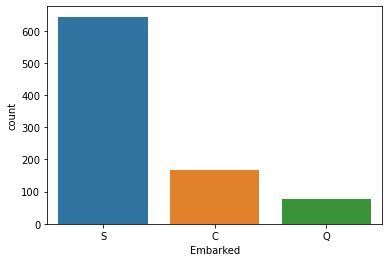

In [10]:
# 먼저 Embarked의 종류와 각 종류별 개수를 확인하기 위해 sns.countplot을 이용한다
sns.countplot(x='Embarked',data=df)

# 그 결과 Embarked 안에 S,C,Q 라는 3가지의 탑승장소가 존재함을 확인하였음

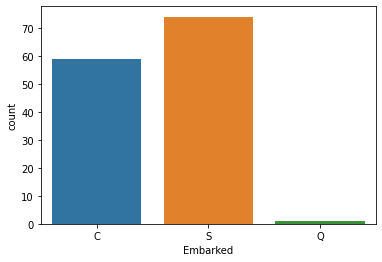

In [11]:
#  그 이후 탑승등급이 1등급이고, 생존여부가 1인 승객들의 데이터를 따로 뽑아 Embarked 종류와 개수를 구해본 결과 S가 가장 많은 수를 가짐을 알 수 있었음
dff = df[(df["Pclass"]==1) & (df["Survived"]==1)]
sns.countplot(x="Embarked",data=dff)

In [12]:
# 따라서 Embarked의 결측치 값에 S값으로 대체해줌
df["Embarked"].fillna("S",inplace=True)

# 그 이후 Embarked의 결측치 값이 사라졌음을 확인함.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
#한편으로는 Cabin의 항목은 891개의 데이터 중에서 687개의 데이터가 값을 가지고 있지 않기 때문에 유의미한 값을 가진다할 수 없다.
#따라서 해당 데이터 프레임에서 Cabin 항목을 제거하고 계속 분석을 진행한다.
df = df.drop(['Cabin'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
# 또한 승객 아이디, 승객 이름, 승객의 티켓 아이디는 크게 생존률에 영향을 주지 않는다 판단하여 데이터 프레임에서 제거하고 분석을 계속 진행항
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
# 이로써 해당 데이터의 결측치는 모두 제거하였다.
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 이상치 확인

- boxplot을 통해 이상치 또한 있는지 확인해보았다. 그 결과 Age, Fare, SibSp, Parch에서 이상치 값을 보였으나 특히 눈에 띄게보이는 이상치는 Fare 열로, Fare 열에 300보다 작은 값이라는 조건을 통해 이상치를 제거하고자 하였다.

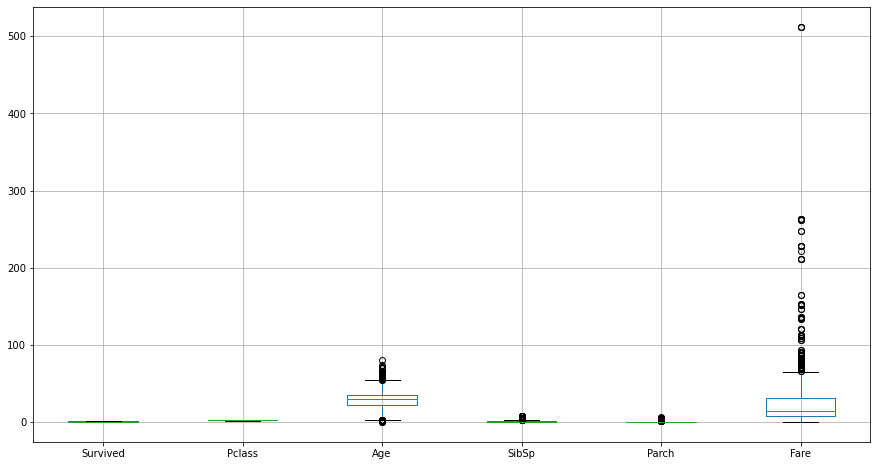

In [16]:
df.boxplot(figsize=(15,8))

In [17]:
# 티켓 가격에서 눈에 띄는 이상치가 발견되어 이상치를 제거해주고 다시 df로 넣는다.
df_rl = df[df["Fare"]<300]
df = df_rl
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


C:\Users\goeunseong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


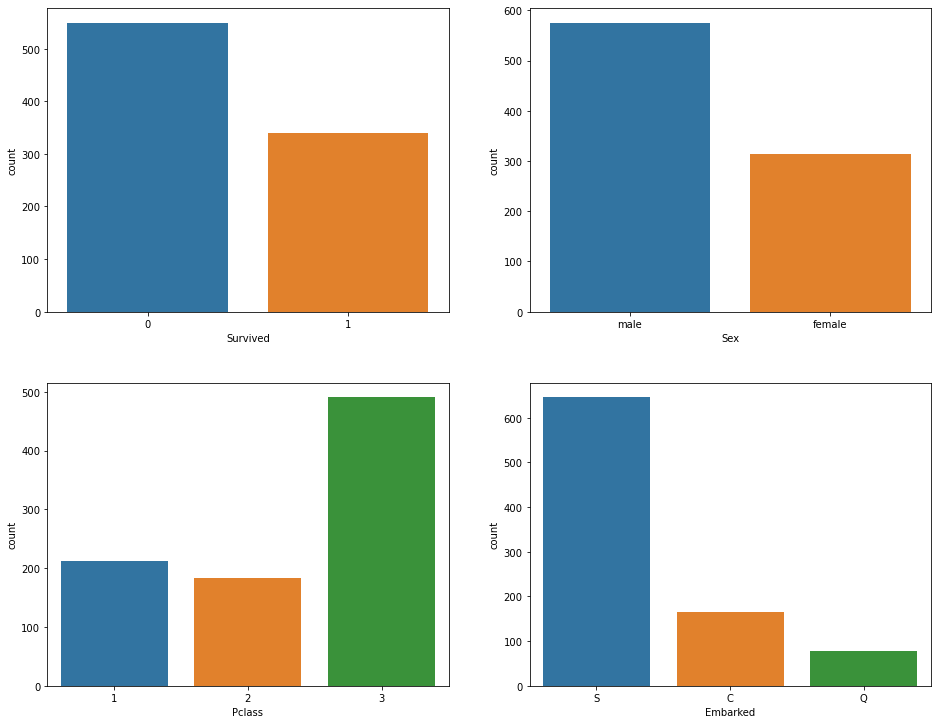

In [20]:
# 생존 여부 
f, ax = plt.subplots(2,2, figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

sns.countplot('Survived', data=df, ax=ax[0,0])
sns.countplot('Sex', data=df, ax=ax[0,1])
sns.countplot('Pclass', data=df, ax=ax[1,0])
sns.countplot('Embarked', data=df, ax=ax[1,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A929C56F70>,
      dtype=object)

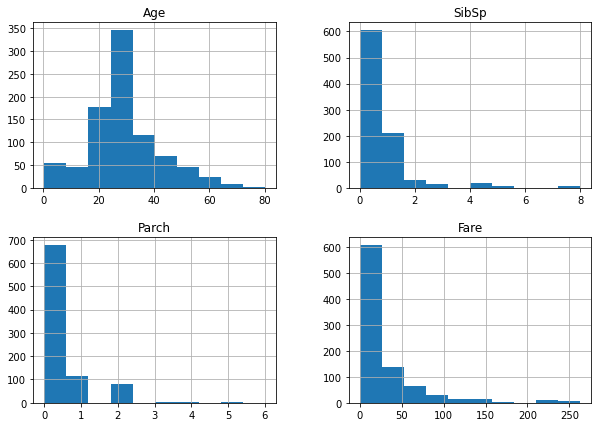

In [21]:
df[['Age', 'SibSp', 'Parch', 'Fare']].hist(figsize = (10,7))

# 나이의 경우 30대가 가장 많고 함께 탑승한 형제·배우자, 자녀 · 부모의 수는 각각 1명이 가장 많음
# 티켓 요금의 경우 100 미만인 경우가 가장 많음

## 목표변수 및 설명변수의 분포 확인

#### 분석목표 : 생존률에 영향을 미치는 영향인자 도출

- 가설1 : 선실등급은 생존에 영향을 주는 설명변수일 것이다. 
- 가설2 : 성별은 생존에 영향을 주는 설명변수일 것이다. 
- 가설3 : 나이는 생존에 영향을 주는 설명변수일 것이다. 
- 가설4 : 승선장소는 생존에 영향을 주는 설명변수일 것이다.
- 가설5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.  
- 가설6 : 함께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수일 것이다.
- 가설7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수일 것이다.

### 가설 1 : 선실등급은 생존에 영향을 주는 설명변수인가

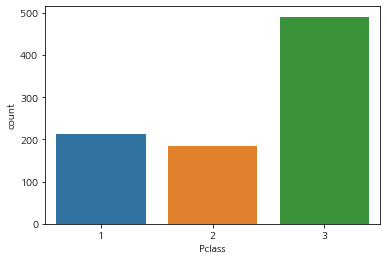

In [17]:
# Pclass(선실등급)의 종류와 개수 확인
sns.countplot(x='Pclass',data=df)

# 확인해 본 결과 3등급에 가장 많이 탔고, 1등급, 2등급 순으로 많이 탔음

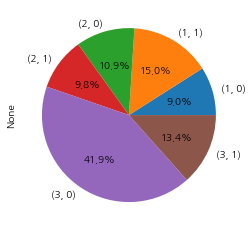

In [48]:
#파이 차트를 이용하여 먼저 Pclass 기준으로 자료 요약을 한다
df_count = df.groupby(["Pclass","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')

### 해석

**해당 자료를 분석해보면 먼저 선실 등급의 종류와 개수에 대한 차트를 보았을 때, 승객들이 3등급에 가장 많이 탔고, 1등급, 2등급 순으로 많이 탔음을 알 수 있었다.**

**또 파이차트를 분석해 보면 전체 생존률은 (15+9.8+13.4) = 38.2% 이다.**

**다음으로 각 등급에서의 생존률은 1등급은 15% , 2등급은 9.8%, 3등급은 13.4%로 1등급이 가장 높은 생존률을 가짐을 알 수 있다.**

또 각 등급 안에서의 생존률을 구해보면 

- 1등급 : 15/(15+9) = 0.625 : 약 62.5% 
- 2등급 : 9.8/(9.8+10.9) = 0.473 : 약 47.3% 
- 3등급 : 13.4 / (13.4 + 41.9) = 0.242 : 약 24.2% 

임을 알 수 있다.

**따라서 1등급에 탔을 때 가장 높은 생존율을 보이며, 2등급 - 3등급 순서대로 생존율이 높기 때문에 **선실등급은 생존에 영향을 주는 설명변수라고 할 수 있다.**

### 가설 2 : 성별은 생존에 영향을 주는 설명변수인가

In [31]:
s_sur = df[['Sex', 'Survived']].groupby(['Sex']).mean()
sns.barplot()

,Survived
Sex,
female,0.741214
male,0.186087


C:\Users\goeunseong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


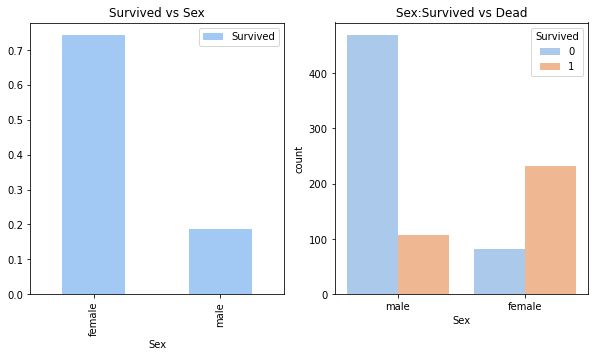

In [46]:
# 성별에 따른 사망자와 생존자
sns.set_palette('pastel')

f,ax=plt.subplots(1,2,figsize=(10,5))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# 

### 해석
성별에 따른 생존여부를 확인한 결과 남자가 약 600명, 여자가 약 300명으로 남자 승객이 여성에 비해 훨씬 높다. 하지만, 성별에 따른 생존자 수는 여성이 더 높은 것을 알 수 있다. 여성의 생존율은 약 0.74, 남성의 경우 약 0.18로 큰 차이가 나는 것을 알 수 있다. 따라서, **여성이 남성보다 높은 생존율을 보이며, 성별이 생존에 영향을 주는 설명변수**라 할 수 있다.

### 가설 3 : 나이는 생존에 영향을 주는 설명변수인가

In [22]:
import math
def age_range(age):
    return (age//10)*10

In [27]:
age_df = df
age_df["Age"] = age_df["Age"].apply(age_range)
age_df.head()

<ipython-input-27-427ef419775a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["Age"] = age_df["Age"].apply(age_range)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,20.0,1,0,7.2500,S
1,1,1,female,30.0,1,0,71.2833,C
2,1,3,female,20.0,0,0,7.9250,S
3,1,1,female,30.0,1,0,53.1000,S
4,0,3,male,30.0,0,0,8.0500,S


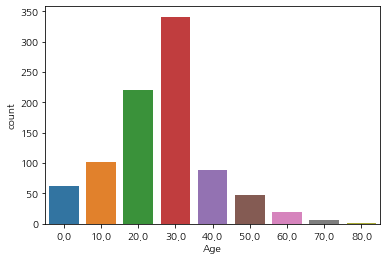

In [55]:
# 각 나이대별로 얼마나 승객이 존재하는지 알아보기 위한 차트
sns.countplot(x='Age',data=df)

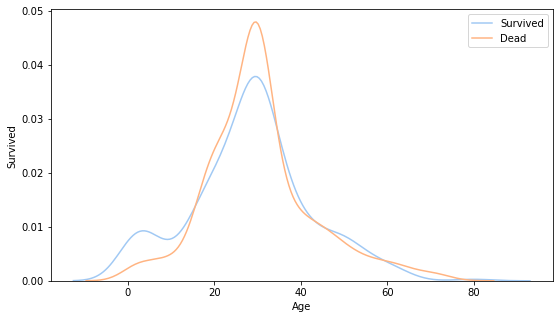

In [47]:
# 나이에 따른 사망자와 생존자

fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()



### 해석

나이에 따른 생존여부를 직관적인 그래프로로 표현한 결과이다. 약 15세 미만의 아이들이 생존률이 사망률보다 높은 것을 알 수 있다. 즉, 앞선 성별에 따른 생존여부와 마찬가지로 신체적으로 약자인 아이들과 여성을 먼저 케어했을 것이라고 예상할 수 있다. 따라서, **나이가 생존에 영향을 미치는 설명변수**라고 할 수 있다.

### 가설 4 : 승선장소는 생존에 영향을 주는 설명변수인가

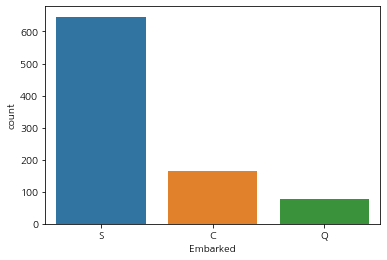

In [56]:
sns.countplot(x='Embarked',data=df)

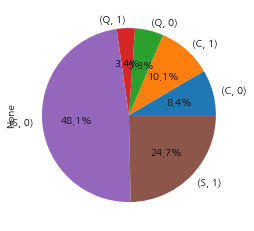

In [49]:
df_count = df.groupby(["Embarked","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')
 

### 해석

**먼저 승선장소의 종류와 승객들의 분포 정도를 확인해 보았더니 S-C-Q 순서대로 승객들이 많이 승선함을 확인하였다.**

**다음으로 각 등급에서의 생존률은 S는 24.7% , C는 10.1%, Q는 3.4%로 S 승선장소가 가장 높은 생존률을 가짐을 알 수 있다.**

또 각 승선장소 안에서의 생존률을 구해보면 

- S : 24.7/72.8 = 0.339 : 약 33.9% 
- C : 10.1/18.5 = 0.545 : 약 54.5% 
- Q : 3.4/ 8.7 = 0.390 : 약 39% 

임을 알 수 있다.

**즉, C 승선장소에서 가장 높은 생존율이 나왔고, 그 다음으로 Q 승선장소-S승선장소 순서대로 생존율을보였기 때문에, 승선장소는 생존에 영향을 주는 설명변수라고 할 수 있다**

**또한 S 승선장소에 승객이 가장 많이 존재했는데, 가장 낮은 생존율을 보이는 것으로 보아 S 승선장소가 조금 저렴한 장소이거나, 실제 사고가 났을때 바로 직접적으로 타격을 받은 장소일 수 있다고 짐작할 수 있다.**

### 가설 5 : 티켓 가격은 생존에 영향을 주는 설명변수인가

In [33]:
# 앞에서 나이 범주화에 기존 데이터를 수정해버렸기에 다시 새롭게 데이터를 불러왔다.

df_again = pd.read_csv("C:\\Users\\user\\Desktop\\POSCO 청년 ai, bigdata 아카데미 14기\\실습파일\\titanic.csv",engine="python",encoding='utf-8')

df_again["Embarked"].fillna("S",inplace=True)
df_again = df_again.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

df_again.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


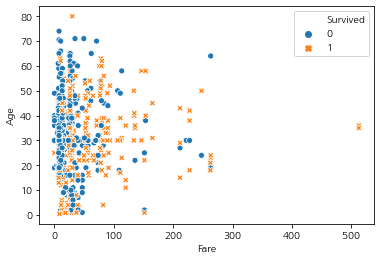

In [34]:
#Scatterplot을 활용하여 티켓가격과 그리고 나이의 생존율과의 관계를 확인해본다. 
sns.scatterplot(x="Fare",y="Age",hue="Survived",style="Survived",data = df_again)

### 해석

- 위의 차트 결과를 보면, 일단 나이별로  생존율의 차이는 크게 차이가 나지 않음을 알 수 있다.
- 하지만 티켓가격을 보면, 생존율이 0인, 즉 사망율이 티켓가격이 작은 곳에 밀집해 있다는 것은 확인할 수 있다.
- 즉, 티켓가격이 비싼 티켓을 산 승객이 낮은 티켓가격을 산 승객보다 생존율이 높다고 말할 수 있으며, 이는 결국 티켓가격도 생존에 영향을 주는 설명변수라고 할 수 있다.

### 가설 6 : 함께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수인가

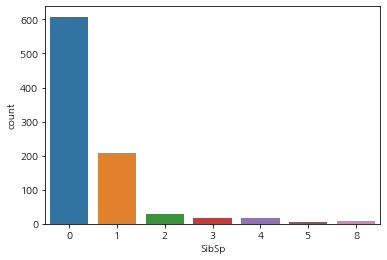

In [40]:
sns.countplot(x='SibSp',data=df_again)

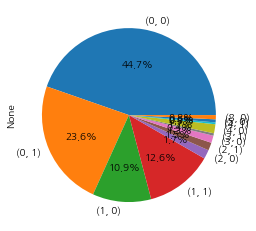

In [50]:
df_count = df_again.groupby(["SibSp","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')

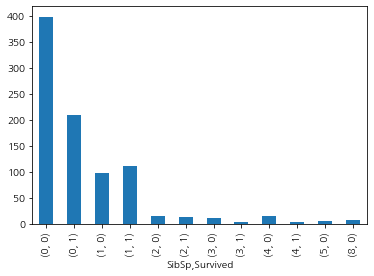

In [42]:
df_group_total = df_again.groupby(["SibSp","Survived"],as_index=False).size()
df_group_total.plot.bar()

### 해석

- 먼저 첫번째 함께탑승수(형제,자매)의 인원수와 그 정도를 보면 함께 타지 않거나 한명과 함께 타는 승객이 가장 많고 그 이후에는 2-8명까지 함께타는 것을 확인할 수 있었다.
- 그리고 파이차트나 바차트를 보면, 자세한 비율을 보지 않아도, 혼자탄 승객이나 한명과 함께 탄 승객을 제외하고는 생존율이 매우 낮음을 확인할 수 있고, 한명과 함께 탄 승객보다 혼자 탄 승객의 생존율이 더욱 높음을 알 수 있다.
- 이는 혼자 탑승한 사람은 혼자 생존하면 되니깐 사고가 발생했을 때 생존을 위해 노력할 수 있지만 함께 간 사람들은 함께 하는 사람들과 함께 생존하려다가, 혹은 자신말고 함께 한 사람의 생존을 도와주려다 사망할 경우도 많아 다음과 같이 수치가 발생했다고 생각할 수 있다.

### 가설 7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수인가

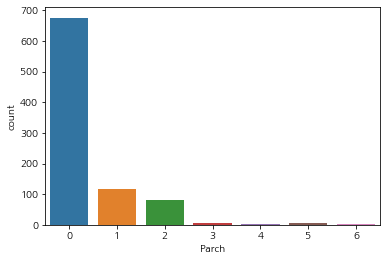

In [36]:
sns.countplot(x='Parch',data=df)

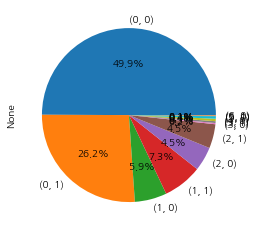

In [51]:
df_count = df_again.groupby(["Parch","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')

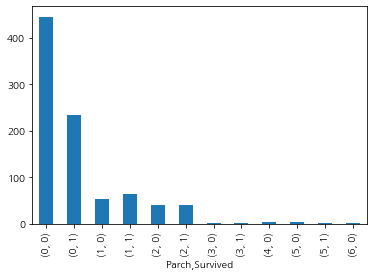

In [52]:
df_group_total = df_again.groupby(["Parch","Survived"],as_index=False).size()
df_group_total.plot.bar()

### 해석

- 먼저 첫번째 함께탑승수(부모,자녀)의 인원수와 그 정도를 보면 혼자 탄 승객이 가장 많고 그 이후에는 1-6명까지 함께타는 것을 확인할 수 있었다.
- 그리고 파이차트나 바차트를 보면, 자세한 비율을 보지 않아도, 혼자탄 승객이 가장 생존율이 높고, 그나마 한명 또는 두명과 함께 탄 승객의 생존율이 다음으로 높으며, 그 외에는 생존율이 매우 낮음을 확인할 수 있다.
- 또한 위의 가설6과 비교해 보았을때, 1명과 같이 탄 승객의 경우 부모 또는 자녀와 함께 탄 승객이 형제 또는 친구와 함께 탄 승객보다 더 생존율이 높음을 확인할 수 있다.
- 이는 부모나 자녀의 경우에는 형제와 친구보다 모성애, 부성애 또는 부모님을 살리고자 하는 마음이 더욱 반영되었다고 해석할 수도 있고, 이러한 노력과 함께함이 생존의 또다른 영향을 줄 수 있는 요소가 될 수도 있다. 


## 결론

**앞서 분석한 내용을 바탕으로 타이타닉 호에서 승객의 생존율에는 선실등급, 성별, 나이, 승선장소, 티켓가격, 함께탑승수 의 요인이 생존에 영향을 주는 설명변수라고 할 수 있으며, 그 외에도 승객간의 관계 등의 또 다른 요인이 생존에 영향을 줄 수 있다는 점을 발견하였다.**
